Get the numerical variables from our dataset.
Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv', index_col=0)
display(customer_df)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [3]:
numerical = customer_df.select_dtypes(np.number)
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


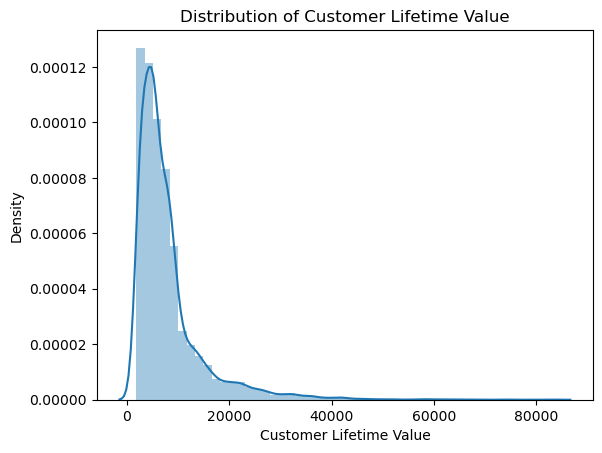

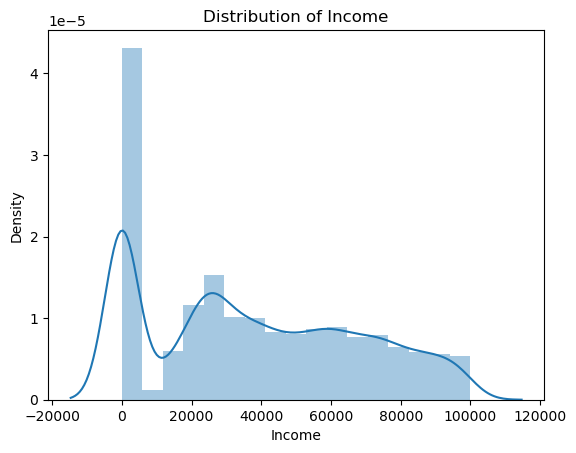

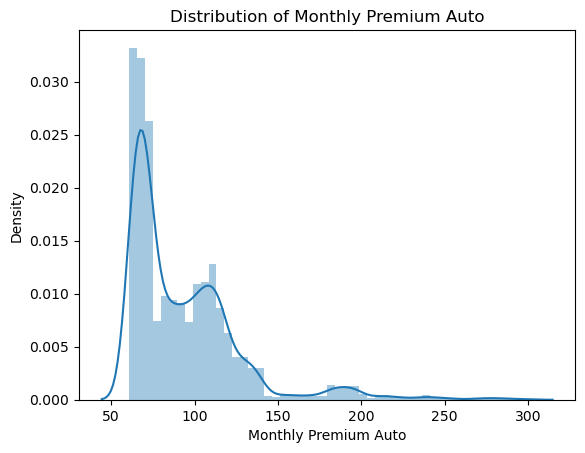

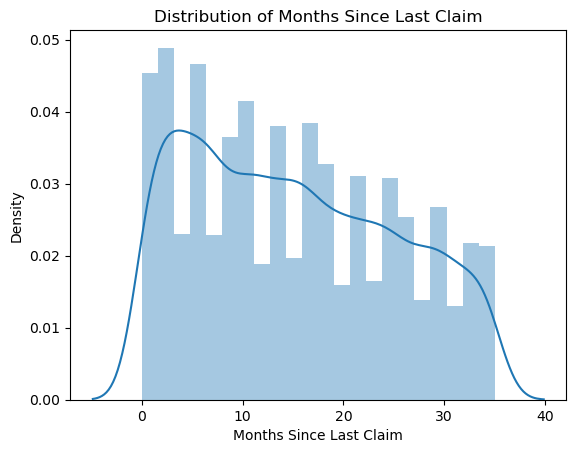

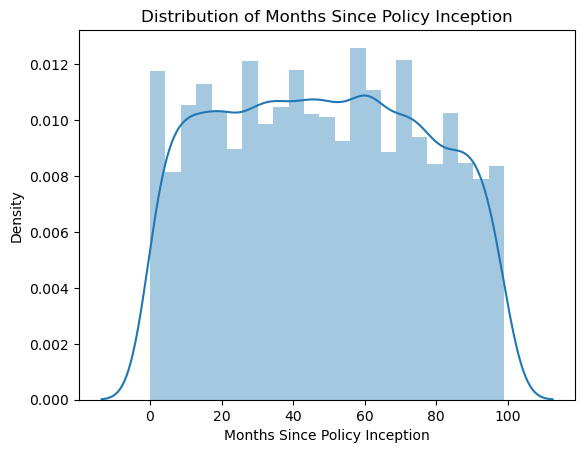

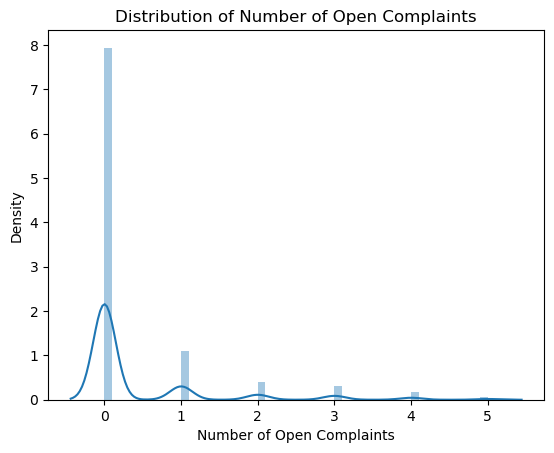

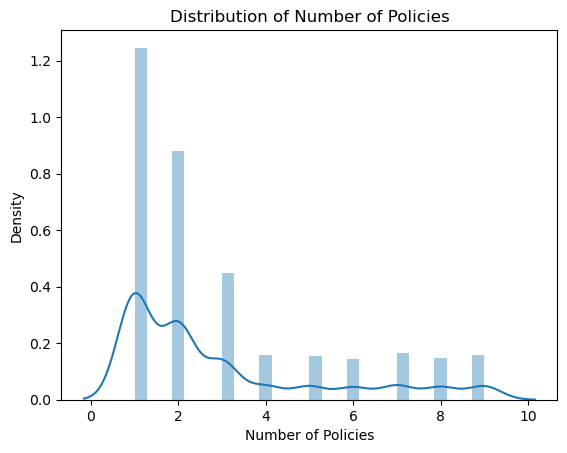

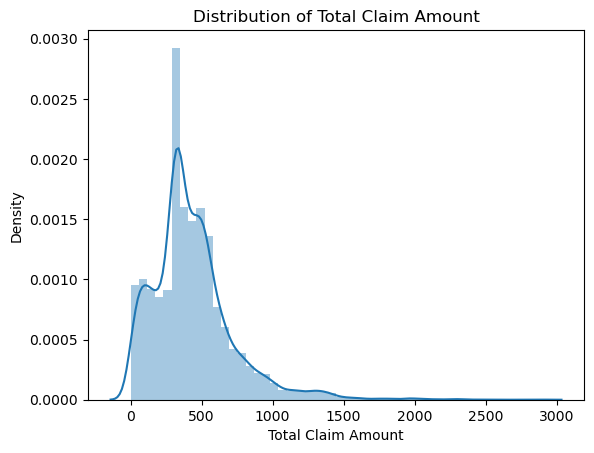

In [8]:
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.title(f'Distribution of {column}')
    plt.show()

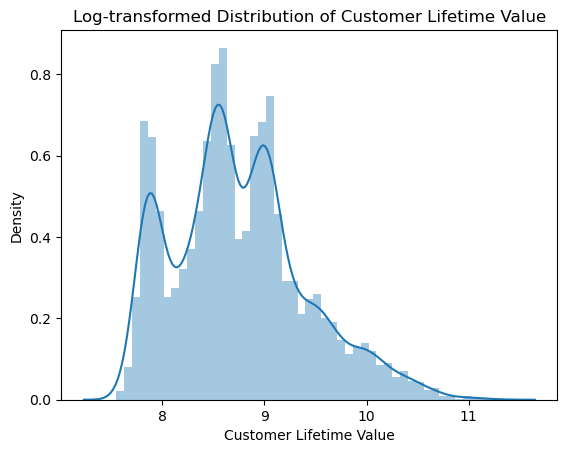

In [9]:
#log transformation on CLV
sns.distplot(np.log1p(numerical['Customer Lifetime Value']))
plt.title('Log-transformed Distribution of Customer Lifetime Value')
plt.show()

In [16]:
# Pour la transformation logarithmique
transformed_log = np.log1p(numerical['Customer Lifetime Value'])
shapiro_test_log = stats.shapiro(transformed_log)
print("Log-transformed Shapiro test statistic:", shapiro_test_log[0])
print("Log-transformed Shapiro test p-value:", shapiro_test_log[1])

Log-transformed Shapiro test statistic: 0.9681869745254517
Log-transformed Shapiro test p-value: 9.214658441707132e-41


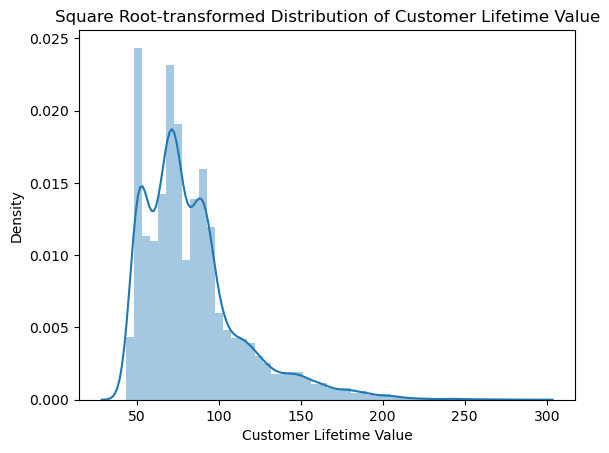

In [12]:
sns.distplot(np.sqrt(numerical['Customer Lifetime Value']))
plt.title('Square Root-transformed Distribution of Customer Lifetime Value')
plt.show()

In [18]:
transformed_sqrt = np.sqrt(numerical['Customer Lifetime Value'])
shapiro_test_sqrt = stats.shapiro(transformed_sqrt)
print("Square Root-transformed Shapiro test statistic:", shapiro_test_sqrt[0])
print("Square Root-transformed Shapiro test p-value:", shapiro_test_sqrt[1])

Square Root-transformed Shapiro test statistic: 0.8721259236335754
Square Root-transformed Shapiro test p-value: 0.0


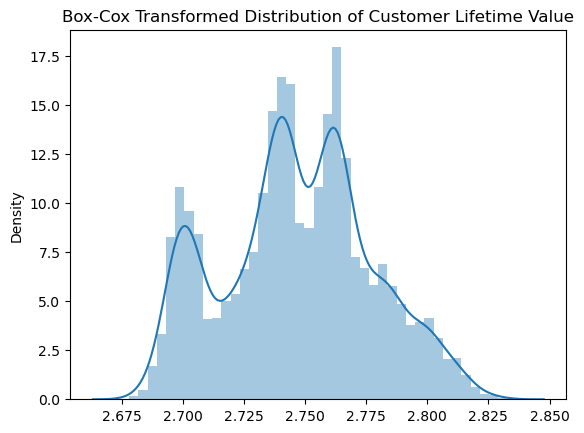

In [13]:
transformed, _ = stats.boxcox(numerical['Customer Lifetime Value'])
sns.distplot(transformed)
plt.title('Box-Cox Transformed Distribution of Customer Lifetime Value')
plt.show()

In [17]:
# Pour la transformation Box-Cox
transformed_boxcox, _ = stats.boxcox(numerical['Customer Lifetime Value'])
shapiro_test_boxcox = stats.shapiro(transformed_boxcox)
print("Box-Cox transformed Shapiro test statistic:", shapiro_test_boxcox[0])
print("Box-Cox transformed Shapiro test p-value:", shapiro_test_boxcox[1])

Box-Cox transformed Shapiro test statistic: 0.9838870763778687
Box-Cox transformed Shapiro test p-value: 6.564000421799581e-31
